In [1]:
# Load modules

import xarray as xr
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import zarr
import gcsfs

# Control TOA Radiation

In [18]:
control_rsdt = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/control_rsdt.nc')
control_rsdt.load()

control_rsut = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/control_rsut.nc')
control_rsut.load()

control_rlut = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/control_rlut.nc')
control_rlut.load()

vert_ds = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/vert_ds.nc')
vert_ds.load()

<xarray.DataArray 'wap' (lat: 88, lon: 179)>
array([[ 9.05317347e-03,  5.35726221e-03,  3.90954921e-03, ...,
         1.37608778e-02,  1.27784014e-02,  1.16651980e-02],
       [ 1.62603296e-02,  1.84076093e-02,  1.68463495e-02, ...,
         2.34749150e-02,  2.32172329e-02,  2.24996507e-02],
       [ 1.72343142e-02,  1.73817184e-02,  1.67526975e-02, ...,
         1.50780585e-02,  1.46754114e-02,  1.46230198e-02],
       ...,
       [-2.22924957e-03, -1.80104235e-03, -1.62051118e-03, ...,
        -1.75005000e-03, -2.10483326e-03, -2.04990618e-03],
       [-6.93217677e-04, -1.27934688e-03, -1.30213355e-03, ...,
        -7.43095938e-04, -8.93206510e-04, -9.83634265e-04],
       [ 4.50923544e-04, -8.85086847e-05,  6.49775393e-05, ...,
        -5.63950336e-04, -4.56162205e-04, -3.77876189e-04]], dtype=float32)
Coordinates:
    plev     float64 5e+04
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [14]:
control_TOA = control_rsdt - control_rsut - control_rlut

Text(0.5, 1.0, 'Interdecadal Control TOA Incoming SW Flux Variability (>25 yrs) - CMIP6 (N=37)')

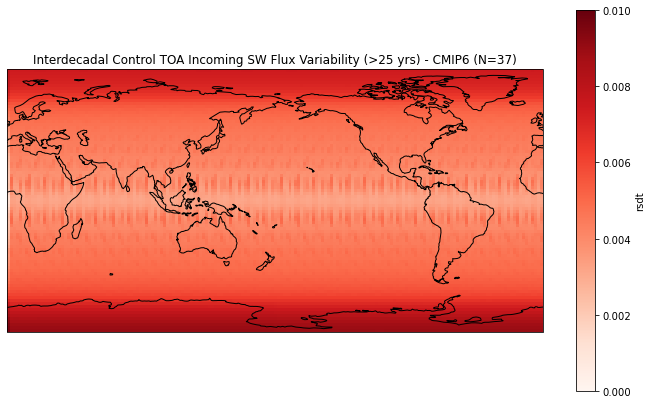

In [7]:
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
control_rsdt.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=0.01)
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Control TOA Incoming SW Flux Variability (>25 yrs) - CMIP6 (N=37)')

Text(0.5, 1.0, 'Interdecadal Control TOA Outgoing SW Flux Variability (>25 yrs) - CMIP6 (N=37)')

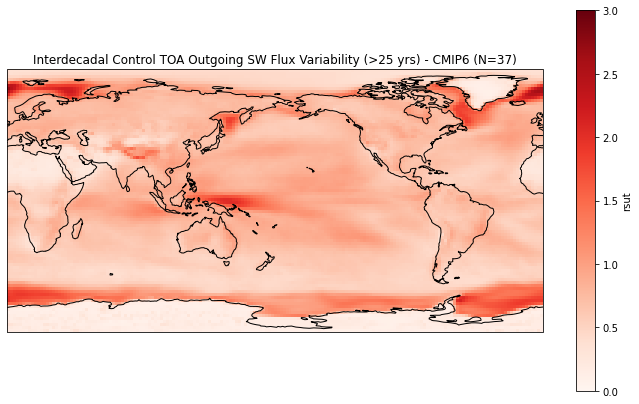

In [9]:
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
control_rsut.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=3)
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Control TOA Outgoing SW Flux Variability (>25 yrs) - CMIP6 (N=37)')

Text(0.5, 1.0, 'Interdecadal Control TOA Outgoing SW Flux Variability (>25 yrs) - CMIP6 (N=37)')

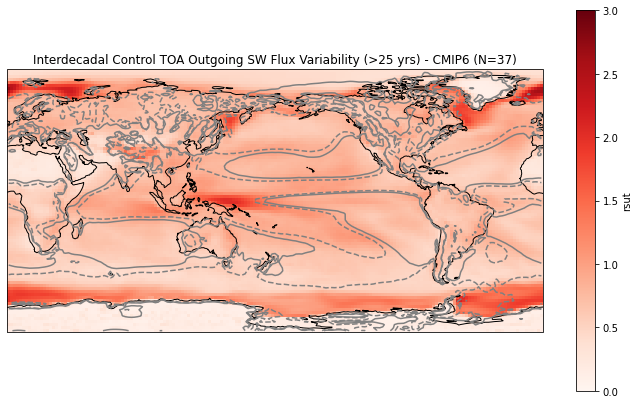

In [19]:
#Added Contours
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
control_rsut.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=3)
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('Interdecadal Control TOA Outgoing SW Flux Variability (>25 yrs) - CMIP6 (N=37)')

Text(0.5, 1.0, 'Interdecadal Control TOA Outgoing LW Flux Variability (>25 yrs) - CMIP6 (N=37)')

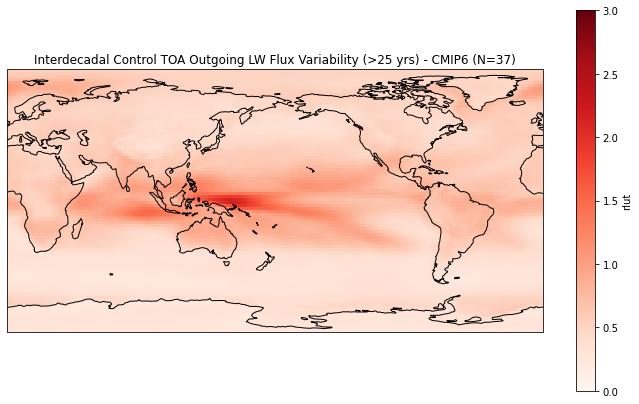

In [15]:
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
control_rlut.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=3)
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Control TOA Outgoing LW Flux Variability (>25 yrs) - CMIP6 (N=37)')

Text(0.5, 1.0, 'Interdecadal Control TOA Outgoing LW Flux Variability (>25 yrs) - CMIP6 (N=37)')

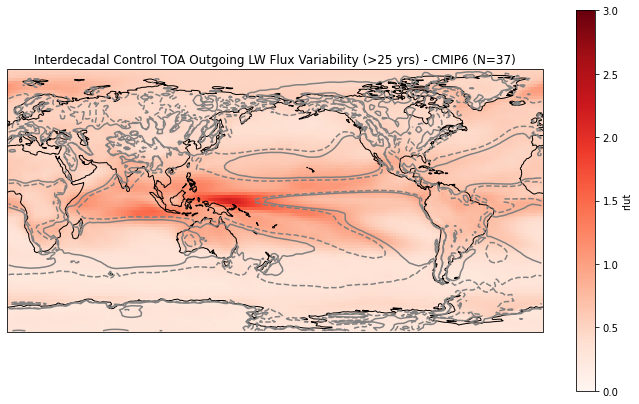

In [20]:
# Added contours
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
control_rlut.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=3)
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('Interdecadal Control TOA Outgoing LW Flux Variability (>25 yrs) - CMIP6 (N=37)')

Text(0.5, 1.0, 'Interdecadal Control TOA Radiation Variability (>25 yrs) - CMIP6 (N=37)')

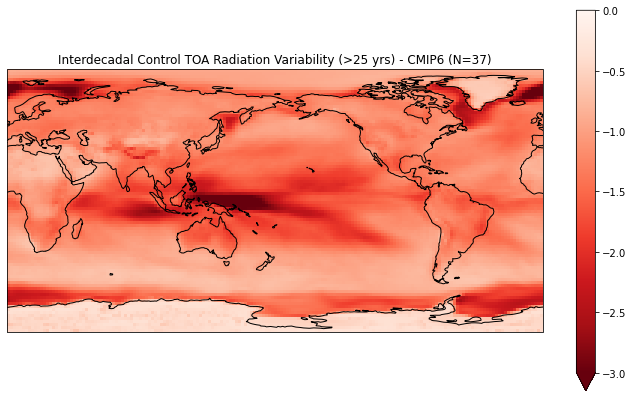

In [16]:
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
control_TOA.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds_r', vmin=-3, vmax=0)
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Control TOA Radiation Variability (>25 yrs) - CMIP6 (N=37)')

Text(0.5, 1.0, 'Interdecadal Control TOA Radiation Variability (>25 yrs) - CMIP6 (N=37)')

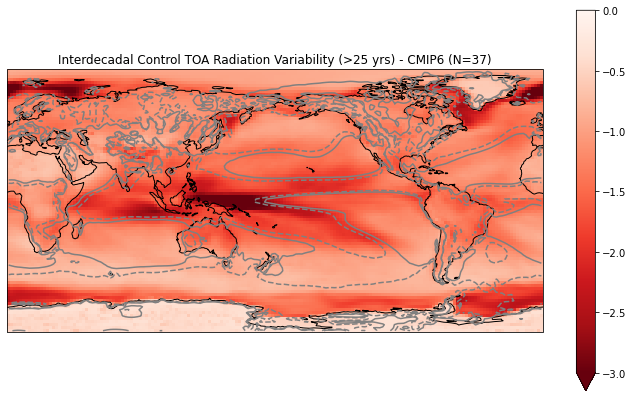

In [21]:
# With contours
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
control_TOA.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds_r', vmin=-3, vmax=0)
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('Interdecadal Control TOA Radiation Variability (>25 yrs) - CMIP6 (N=37)')

# Historical TOA Radiation

In [22]:
hist_rsdt = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/hist_rsdt.nc')
hist_rsdt.load()

hist_rsut = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/hist_rsut.nc')
hist_rsut.load()

hist_rlut = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/hist_rlut.nc')
hist_rlut.load()

<xarray.DataArray 'rlut' (lat: 88, lon: 179)>
array([[0.3450818 , 0.35482852, 0.35652034, ..., 0.34955733, 0.34753721,
        0.35069058],
       [0.34738272, 0.36036458, 0.36524736, ..., 0.338518  , 0.34283282,
        0.34770487],
       [0.36726665, 0.37510124, 0.37542497, ..., 0.35218373, 0.35248875,
        0.35758807],
       ...,
       [0.79431606, 0.78234447, 0.78765908, ..., 0.75728123, 0.76235652,
        0.76662948],
       [0.76726282, 0.74952317, 0.7540248 , ..., 0.741539  , 0.74294985,
        0.74495759],
       [0.74268365, 0.72425726, 0.72642752, ..., 0.72644251, 0.72565324,
        0.7257522 ]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [24]:
hist_TOA = hist_rsdt - hist_rsut - hist_rlut

Text(0.5, 1.0, 'Interdecadal Historical TOA Incoming SW Flux Variability (>25 yrs) - CMIP6 (N=37)')

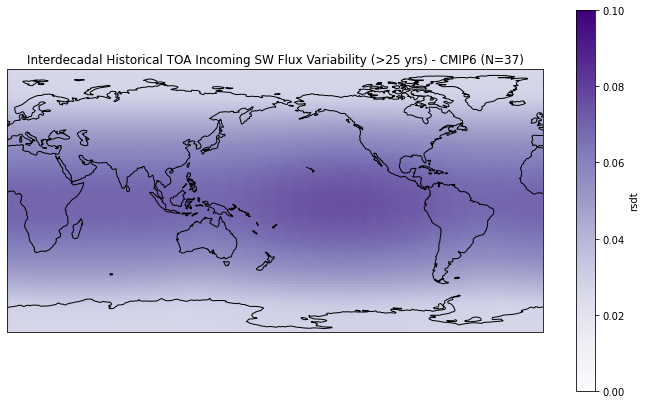

In [25]:
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
hist_rsdt.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', vmin=0, vmax=0.1)
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Historical TOA Incoming SW Flux Variability (>25 yrs) - CMIP6 (N=37)')

Text(0.5, 1.0, 'Interdecadal Historical TOA Outgoing SW Flux Variability (>25 yrs) - CMIP6 (N=37)')

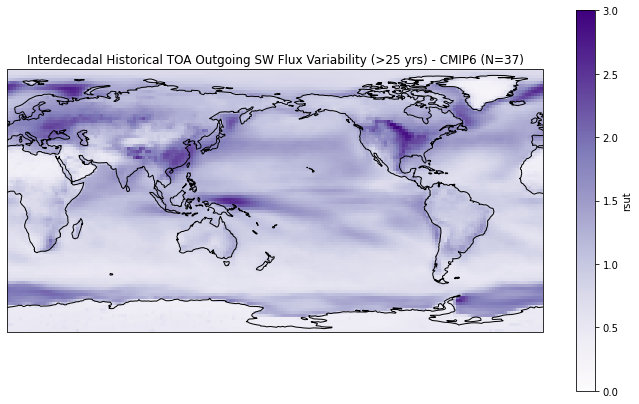

In [26]:
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
hist_rsut.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', vmin=0, vmax=3)
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Historical TOA Outgoing SW Flux Variability (>25 yrs) - CMIP6 (N=37)')

Text(0.5, 1.0, 'Interdecadal Historical TOA Outgoing LW Flux Variability (>25 yrs) - CMIP6 (N=37)')

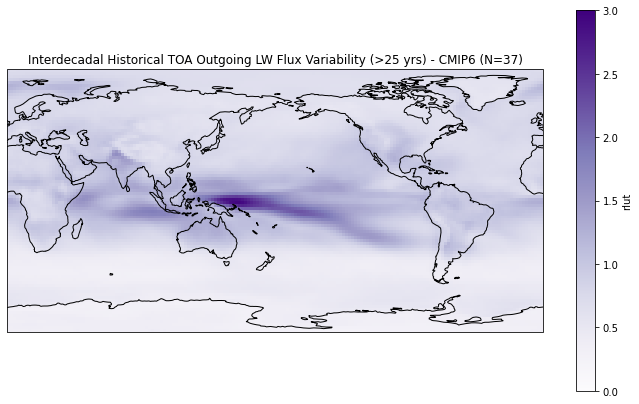

In [27]:
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
hist_rlut.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', vmin=0, vmax=3)
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Historical TOA Outgoing LW Flux Variability (>25 yrs) - CMIP6 (N=37)')

Text(0.5, 1.0, 'Interdecadal Historical TOA Radiation Variability (>25 yrs) - CMIP6 (N=37)')

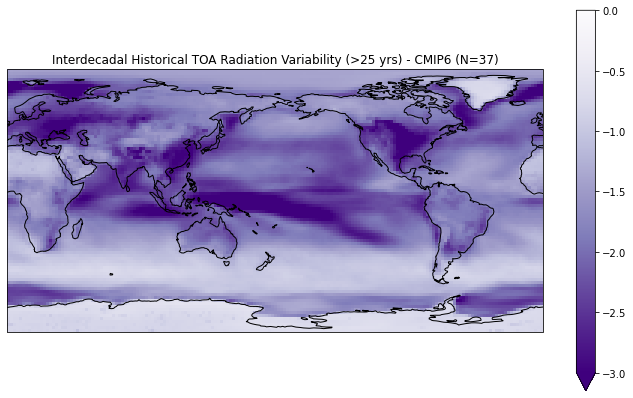

In [28]:
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
hist_TOA.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples_r', vmin=-3, vmax=0)
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Historical TOA Radiation Variability (>25 yrs) - CMIP6 (N=37)')

# Change in variability

In [29]:
change_rsdt = hist_rsdt - control_rsdt

Text(0.5, 1.0, 'Change in Interdecadal TOA Incoming SW Variability (>25 yrs) - CMIP6 (N=37)')

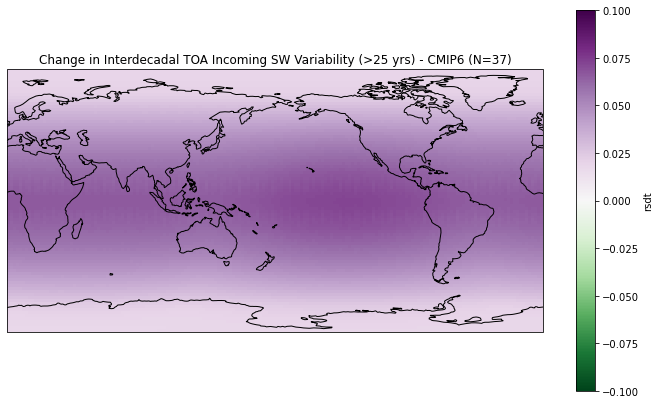

In [30]:
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
change_rsdt.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-0.1, vmax=0.1)
ax.coastlines(color='black', linewidth=1)
plt.title('Change in Interdecadal TOA Incoming SW Variability (>25 yrs) - CMIP6 (N=37)')

In [31]:
change_rsut = hist_rsut - control_rsut

Text(0.5, 1.0, 'Change in Interdecadal TOA Outgoing SW Variability (>25 yrs) - CMIP6 (N=37)')

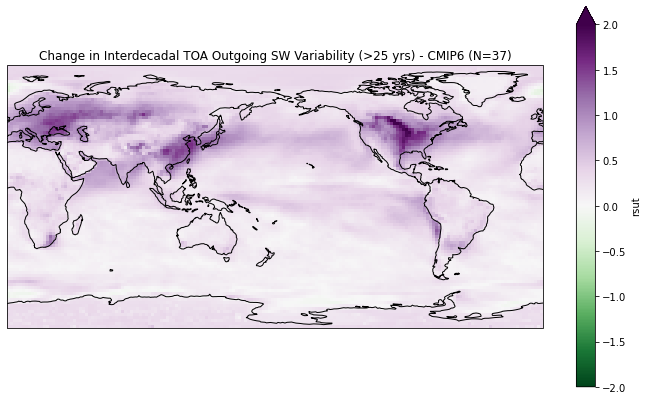

In [32]:
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
change_rsut.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-2.0, vmax=2)
ax.coastlines(color='black', linewidth=1)
plt.title('Change in Interdecadal TOA Outgoing SW Variability (>25 yrs) - CMIP6 (N=37)')

Text(0.5, 1.0, 'Change in Interdecadal TOA Outgoing SW Variability (>25 yrs) - CMIP6 (N=37)')

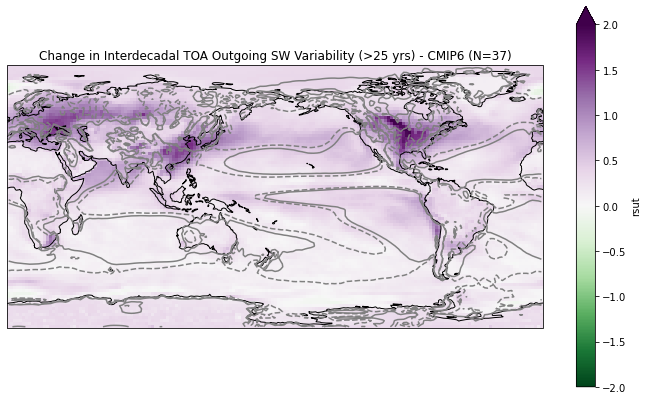

In [33]:
# With contours
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
change_rsut.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-2.0, vmax=2)
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('Change in Interdecadal TOA Outgoing SW Variability (>25 yrs) - CMIP6 (N=37)')

In [34]:
change_rlut = hist_rlut - control_rlut

Text(0.5, 1.0, 'Change in Interdecadal TOA Outgoing LW Variability (>25 yrs) - CMIP6 (N=37)')

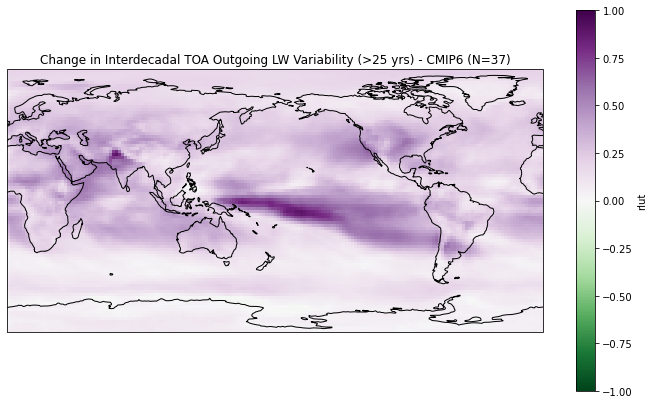

In [35]:
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
change_rlut.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-1, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Change in Interdecadal TOA Outgoing LW Variability (>25 yrs) - CMIP6 (N=37)')

Text(0.5, 1.0, 'Change in Interdecadal TOA Outgoing LW Variability (>25 yrs) - CMIP6 (N=37)')

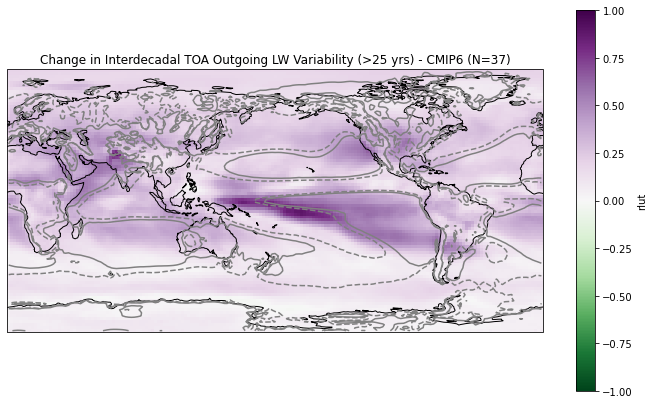

In [36]:
# Added contours
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
change_rlut.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-1, vmax=1)
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('Change in Interdecadal TOA Outgoing LW Variability (>25 yrs) - CMIP6 (N=37)')

In [37]:
change_TOA = hist_TOA - control_TOA

Text(0.5, 1.0, 'Change in Interdecadal TOA Radiation Variability (>25 yrs) - CMIP6 (N=37)')

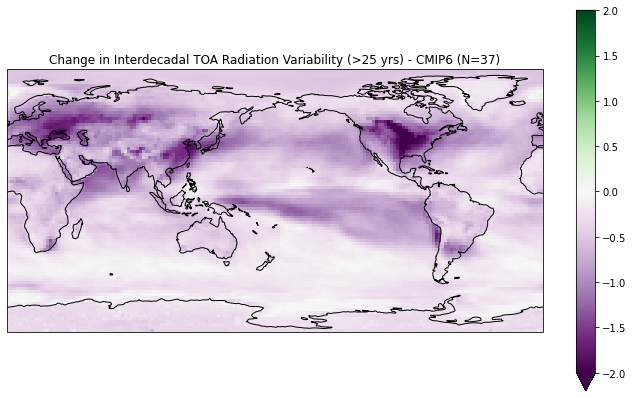

In [38]:
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
change_TOA.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn', vmin=-2, vmax=2)
ax.coastlines(color='black', linewidth=1)
plt.title('Change in Interdecadal TOA Radiation Variability (>25 yrs) - CMIP6 (N=37)')

Text(0.5, 1.0, 'Change in Interdecadal TOA Radiation Variability (>25 yrs) - CMIP6 (N=37)')

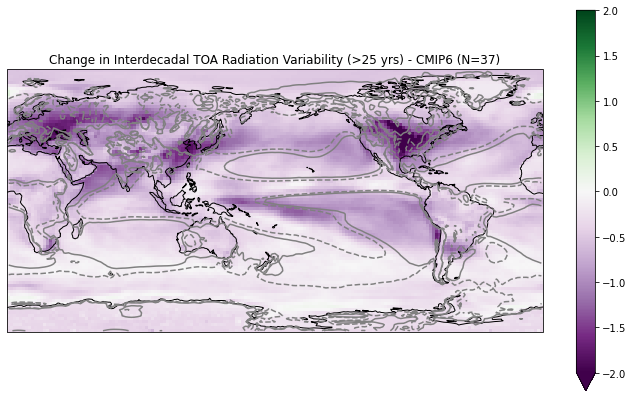

In [39]:
# Added contours
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
change_TOA.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn', vmin=-2, vmax=2)
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('Change in Interdecadal TOA Radiation Variability (>25 yrs) - CMIP6 (N=37)')

# Percentage change in variability

In [40]:
percent_rsdt = change_rsdt*100/control_rsdt

Text(0.5, 1.0, 'Percentage Change in Interdecadal Incoming SW Variability (>25 yrs) - CMIP6 (N=37)')

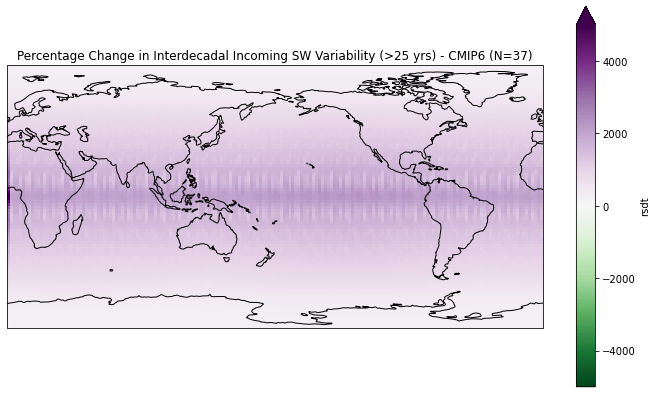

In [41]:
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_rsdt.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-5000, vmax=5000)
ax.coastlines(color='black', linewidth=1)
plt.title('Percentage Change in Interdecadal Incoming SW Variability (>25 yrs) - CMIP6 (N=37)')

In [42]:
percent_rsut = change_rsut*100/control_rsut

Text(0.5, 1.0, 'Percentage Change in Interdecadal Outgoing SW Variability (>25 yrs) - CMIP6 (N=37)')

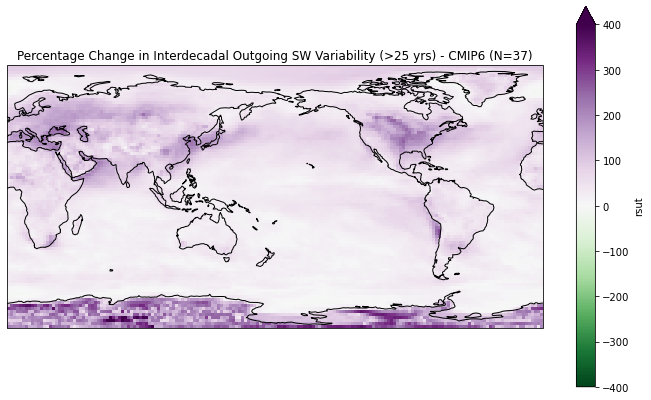

In [43]:
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_rsut.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-400, vmax=400)
ax.coastlines(color='black', linewidth=1)
plt.title('Percentage Change in Interdecadal Outgoing SW Variability (>25 yrs) - CMIP6 (N=37)')

Text(0.5, 1.0, 'Percentage Change in Interdecadal Outgoing SW Variability (>25 yrs) - CMIP6 (N=37)')

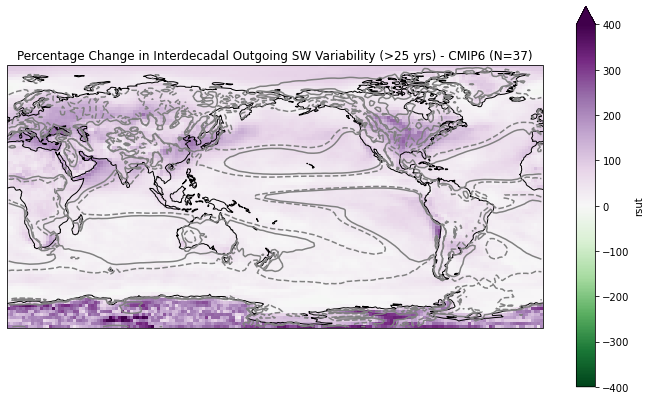

In [44]:
# with contours
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_rsut.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-400, vmax=400)
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('Percentage Change in Interdecadal Outgoing SW Variability (>25 yrs) - CMIP6 (N=37)')

In [45]:
percent_rlut = change_rlut*100/control_rlut

Text(0.5, 1.0, 'Percentage Change in Interdecadal Outgoing LW Variability (>25 yrs) - CMIP6 (N=37)')

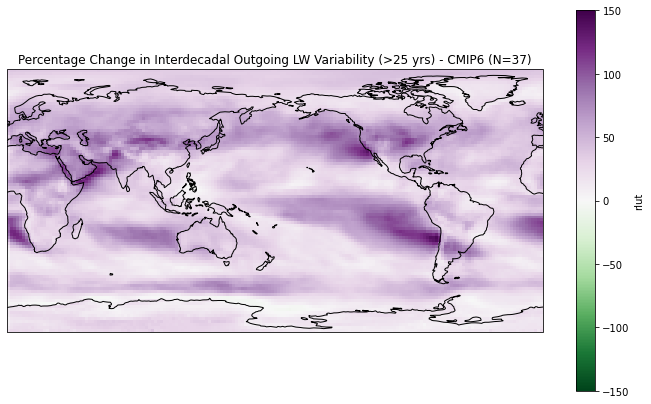

In [46]:
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_rlut.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-150, vmax=150)
ax.coastlines(color='black', linewidth=1)
plt.title('Percentage Change in Interdecadal Outgoing LW Variability (>25 yrs) - CMIP6 (N=37)')

Text(0.5, 1.0, 'Percentage Change in Interdecadal Outgoing LW Variability (>25 yrs) - CMIP6 (N=37)')

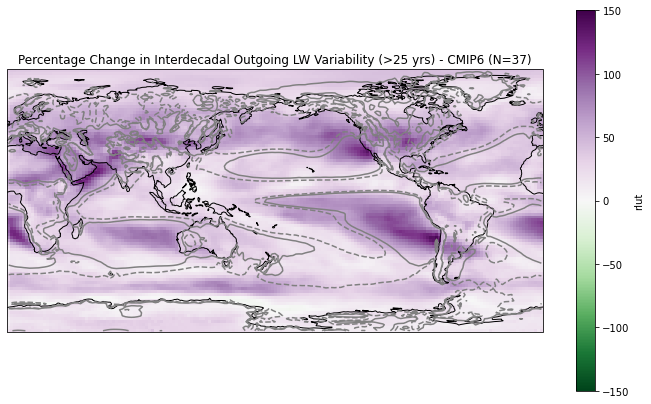

In [47]:
# With contours
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_rlut.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-150, vmax=150)
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('Percentage Change in Interdecadal Outgoing LW Variability (>25 yrs) - CMIP6 (N=37)')

In [48]:
percent_TOA = change_TOA*100/control_TOA

Text(0.5, 1.0, 'Percentage Change in Interdecadal TOA Radiation Variability (>25 yrs) - CMIP6 (N=37)')

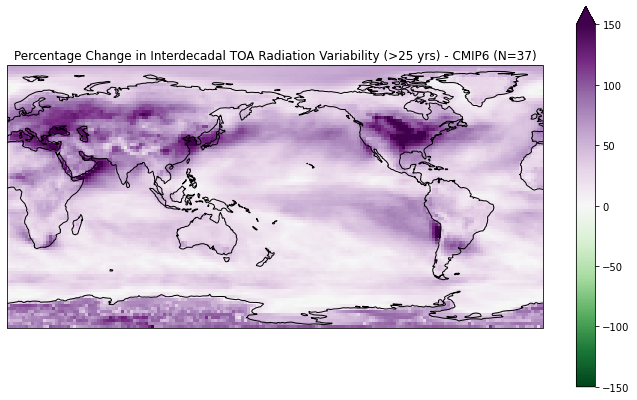

In [49]:
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_TOA.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-150, vmax=150)
ax.coastlines(color='black', linewidth=1)
plt.title('Percentage Change in Interdecadal TOA Radiation Variability (>25 yrs) - CMIP6 (N=37)')

Text(0.5, 1.0, 'Percentage Change in Interdecadal TOA Radiation Variability (>25 yrs) - CMIP6 (N=37)')

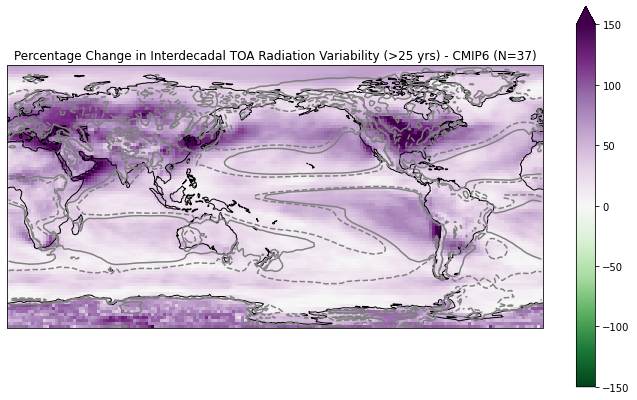

In [50]:
# With contours
plt.rcParams['figure.figsize'] = [12,7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_TOA.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-150, vmax=150)
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('Percentage Change in Interdecadal TOA Radiation Variability (>25 yrs) - CMIP6 (N=37)')